# Análise Exploratória de Dados (EDA) - Dados do CEMADEN

Este notebook tem como objetivo realizar uma análise exploratória dos dados processados do CEMADEN, com foco especial na validação e ajuste dos limiares de risco de enchente.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações do Matplotlib
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# Carregar o dataset processado de chuvas
df_processed = pd.read_csv('../data/cemaden_official_processed_hourly.csv')
df_processed['datahora_utc_hora'] = pd.to_datetime(df_processed['datahora_utc_hora'])
df_processed['datahora_brasilia_ref'] = pd.to_datetime(df_processed['datahora_brasilia_ref'])

print("Dataset de chuvas carregado com sucesso!")
print(f"Shape do dataset de chuvas: {df_processed.shape}")
df_processed.head()

Dataset de chuvas carregado com sucesso!
Shape do dataset de chuvas: (240429, 15)


,cod_estacao,datahora_utc_hora,acumulado_chuva_1_h_mm,municipio,uf,nome_estacao,latitude,longitude,datahora_brasilia_ref,ano,mes,dia,hora_brasilia,dia_semana_brasilia,nivel_risco
0,355030801A,2025-01-01 00:00:00,0.0,SÃO PAULO,SP,Jardim Paulistano,-23.582,-46.751,2024-12-31 21:20:00,2024,12,31,21,1,0
1,355030801A,2025-01-01 01:00:00,0.0,SÃO PAULO,SP,Jardim Paulistano,-23.582,-46.751,2024-12-31 22:20:00,2024,12,31,22,1,0
2,355030801A,2025-01-01 02:00:00,0.0,SÃO PAULO,SP,Jardim Paulistano,-23.582,-46.751,2024-12-31 23:20:00,2024,12,31,23,1,0
3,355030801A,2025-01-01 03:00:00,0.0,SÃO PAULO,SP,Jardim Paulistano,-23.582,-46.751,2025-01-01 00:20:00,2025,1,1,0,2,0
4,355030801A,2025-01-01 04:00:00,0.0,SÃO PAULO,SP,Jardim Paulistano,-23.582,-46.751,2025-01-01 01:20:00,2025,1,1,1,2,0


## 1. Visualização Inicial dos Dados e Estatísticas Descritivas (Dados de Chuva)

In [17]:
df_processed.info()
df_processed.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240429 entries, 0 to 240428
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   cod_estacao             240429 non-null  object        
 1   datahora_utc_hora       240429 non-null  datetime64[ns]
 2   acumulado_chuva_1_h_mm  240429 non-null  float64       
 3   municipio               240429 non-null  object        
 4   uf                      240429 non-null  object        
 5   nome_estacao            240429 non-null  object        
 6   latitude                240429 non-null  float64       
 7   longitude               240429 non-null  float64       
 8   datahora_brasilia_ref   240429 non-null  datetime64[ns]
 9   ano                     240429 non-null  int64         
 10  mes                     240429 non-null  int64         
 11  dia                     240429 non-null  int64         
 12  hora_brasilia           240429

,cod_estacao,datahora_utc_hora,acumulado_chuva_1_h_mm,municipio,uf,nome_estacao,latitude,longitude,datahora_brasilia_ref,ano,mes,dia,hora_brasilia,dia_semana_brasilia,nivel_risco
count,240429,240429,240429.000000,240429,240429,240429,240429.000000,240429.000000,240429,240429.000000,240429.000000,240429.000000,240429.000000,240429.000000,240429.000000
unique,73,NaN,NaN,1,1,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,355030875A,NaN,NaN,SÃO PAULO,SP,Jabaquara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3622,NaN,NaN,240429,240429,7216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2025-03-17 05:38:51.542368,0.174757,NaN,NaN,NaN,-23.586063,-46.621293,2025-03-17 02:57:21.855183872,2024.999218,3.011134,15.595827,11.495535,3.008373,0.007312
min,NaN,2025-01-01 00:00:00,0.000000,NaN,NaN,NaN,-23.829000,-46.794000,2024-12-31 21:00:00,2024.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,NaN,2025-02-08 02:00:00,0.000000,NaN,NaN,NaN,-23.644120,-46.727000,2025-02-07 23:00:00,2025.000000,2.000000,8.000000,5.000000,1.000000,0.000000
50%,NaN,2025-03-17 04:00:00,0.000000,NaN,NaN,NaN,-23.580000,-46.640000,2025-03-17 01:00:00,2025.000000,3.000000,16.000000,11.000000,3.000000,0.000000
75%,NaN,2025-04-23 11:00:00,0.000000,NaN,NaN,NaN,-23.513000,-46.523000,2025-04-23 08:30:00,2025.000000,4.000000,23.000000,18.000000,5.000000,0.000000
max,NaN,2025-05-31 23:00:00,85.390000,NaN,NaN,NaN,-23.407000,-46.381210,2025-05-31 20:50:00,2025.000000,12.000000,31.000000,23.000000,6.000000,2.000000


## 2. Análise da Coluna `acumulado_chuva_1_h_mm` e `nivel_risco` (Dados de Chuva)

Vamos analisar a distribuição do acumulado de chuva e como os níveis de risco atuais se comportam.

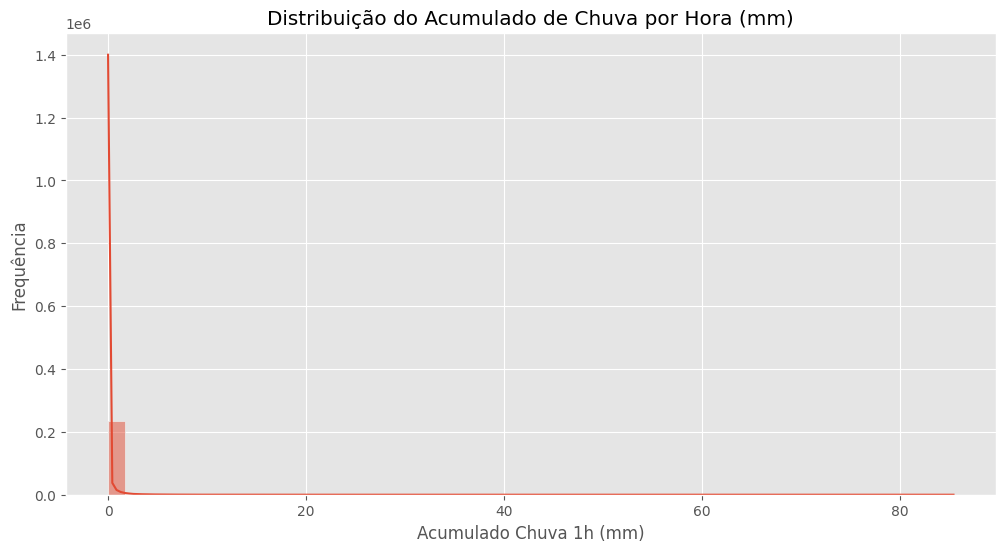

C:\Users\gugue\AppData\Local\Temp\ipykernel_25260\2954723720.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='nivel_risco', data=df_processed, palette='viridis')


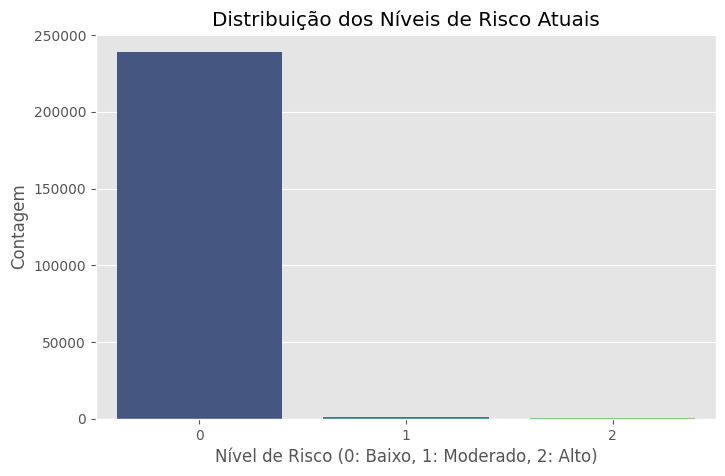

Contagem de Níveis de Risco:
nivel_risco
0    99.369876
1     0.529054
2     0.101069
Name: proportion, dtype: float64

Estatísticas do acumulado de chuva por nível de risco:


,min,mean,max,count
nivel_risco,,,,
0,0.0,0.099463,5.49,238914
1,5.5,9.097138,17.97,1272
2,18.0,27.498313,85.39,243


In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(df_processed['acumulado_chuva_1_h_mm'], bins=50, kde=True)
plt.title('Distribuição do Acumulado de Chuva por Hora (mm)')
plt.xlabel('Acumulado Chuva 1h (mm)')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='nivel_risco', data=df_processed, palette='viridis')
plt.title('Distribuição dos Níveis de Risco Atuais')
plt.xlabel('Nível de Risco (0: Baixo, 1: Moderado, 2: Alto)')
plt.ylabel('Contagem')
plt.show()

print("Contagem de Níveis de Risco:")
print(df_processed['nivel_risco'].value_counts(normalize=True) * 100)

print("\nEstatísticas do acumulado de chuva por nível de risco:")
df_processed.groupby('nivel_risco')['acumulado_chuva_1_h_mm'].agg(['min', 'mean', 'max', 'count'])

## 3. Carregamento e Análise dos Eventos de Enchente

Nesta seção, vamos carregar as informações do arquivo `data/eventos_enchentes_sp_2025.csv`.

In [19]:
def parse_horario_csv(horario_str):
    horario_str_original = horario_str # Para debug
    horario_str = str(horario_str).lower().strip()
    if pd.isna(horario_str) or horario_str == 'nan' or horario_str == '':
        return pd.NaT
    if 'madrugada' in horario_str:
        return pd.to_datetime('02:00:00', format='%H:%M:%S').time() # Representa madrugada como 2 AM
    if '~' in horario_str:
        horario_str = horario_str.replace('~', '')
    
    # Tentar formatar HHhMM ou HHh
    if 'h' in horario_str and not ':' in horario_str:
        parts = horario_str.split('h')
        hour = parts[0]
        minute = parts[1] if len(parts) > 1 and parts[1] else '00'
        horario_str = f"{hour}:{minute}"
    
    # Tentar formatar HH:MM-HH:MM (pegar o primeiro horário)
    if '-' in horario_str and ':' in horario_str:
        horario_str = horario_str.split('-')[0].strip()

    try:
        return pd.to_datetime(horario_str, format='%H:%M').time()
    except ValueError:
        try:
            return pd.to_datetime(horario_str, format='%H:%M:%S').time()
        except ValueError:
            # print(f"DEBUG: Não foi possível parsear horário: {horario_str_original}")
            return pd.NaT

try:
    df_eventos_reais = pd.read_csv('../data/eventos_enchentes_sp_2025.csv')
    
    df_eventos_reais.columns = df_eventos_reais.columns.str.strip()
    for col in df_eventos_reais.columns:
        if df_eventos_reais[col].dtype == 'object':
            df_eventos_reais[col] = df_eventos_reais[col].str.strip()
            
    df_eventos_reais['Data'] = pd.to_datetime(df_eventos_reais['Data'], format='%d/%m/%Y')
    df_eventos_reais['Latitude'] = pd.to_numeric(df_eventos_reais['Latitude'], errors='coerce')
    df_eventos_reais['Longitude'] = pd.to_numeric(df_eventos_reais['Longitude'], errors='coerce')
    df_eventos_reais['Vitimas_Num'] = df_eventos_reais['Vitimas_Desc'].astype(str).str.extract(r'(\d+)').fillna(0).astype(int)
    df_eventos_reais['Desabrigados_Num'] = df_eventos_reais['Desabrigados_Desc'].astype(str).str.extract(r'(\d+)').fillna(0).astype(int)
    df_eventos_reais['Horario_Parsed'] = df_eventos_reais['Horario'].apply(parse_horario_csv)
    
    df_eventos_reais['datahora_evento_aproximada'] = pd.NaT # Inicializar com NaT
    for index, row in df_eventos_reais.iterrows():
        if pd.notna(row['Data']) and pd.notna(row['Horario_Parsed']):
            try:
                df_eventos_reais.loc[index, 'datahora_evento_aproximada'] = pd.Timestamp.combine(row['Data'].date(), row['Horario_Parsed'])
            except Exception as e:
                # print(f"Erro ao combinar data e hora para evento {index} ({row['Data']}, {row['Horario_Parsed']}): {e}")
                pass # Mantém NaT se houver erro
        elif pd.notna(row['Data']):
             # Se não houver horário, mas houver data, podemos manter a data (ou definir um horário padrão como meio-dia)
             # Por enquanto, deixaremos NaT se o horário não for parseável.
             pass 

    print("Eventos de enchente carregados do CSV:")
    print(df_eventos_reais[['Data', 'Horario', 'Horario_Parsed', 'datahora_evento_aproximada', 'Bairro_Localizacao', 'Vitimas_Num', 'Desabrigados_Num']].head())
    print(f"Total de {len(df_eventos_reais)} eventos encontrados.")

except FileNotFoundError:
    print("Arquivo '../data/eventos_enchentes_sp_2025.csv' não encontrado.")
    df_eventos_reais = pd.DataFrame() 
except Exception as e:
    print(f"Erro ao processar o arquivo CSV de eventos: {e}")
    df_eventos_reais = pd.DataFrame()


Eventos de enchente carregados do CSV:
        Data      Horario Horario_Parsed datahora_evento_aproximada  \
0 2025-02-01       ~20h34       20:34:00        2025-02-01 20:34:00   
1 2025-02-01    Madrugada       02:00:00        2025-02-01 02:00:00   
2 2025-02-01    Madrugada       02:00:00        2025-02-01 02:00:00   
3 2025-01-24  15h27-17h35       15:27:00        2025-01-24 15:27:00   
4 2025-05-20       ~00h00       00:00:00        2025-05-20 00:00:00   

               Bairro_Localizacao  Vitimas_Num  Desabrigados_Num  
0       Vila Prudente (Rua Prece)            1                 0  
1                 Franco da Rocha            0                 2  
2                         Cajamar            0               100  
3    Múltiplas regiões da capital            0                 0  
4  Santo Amaro (Rua João de Levy)            0                 0  
Total de 5 eventos encontrados.


### 3.1. Cruzamento dos Dados de Chuva com Eventos de Enchente

Agora, vamos cruzar os `df_eventos_reais` com `df_processed`.
Para isso, vamos focar nos dias dos eventos. Se o horário específico do evento for conhecido e confiável, poderíamos filtrar ainda mais.


Encontrados 7973 registros de chuva em dias com eventos reportados.
  datahora_brasilia_ref  acumulado_chuva_1_h_mm  nivel_risco  \
0   2025-01-24 04:10:00                    5.75            1   
1   2025-01-24 11:10:00                   16.12            1   
2   2025-01-24 12:00:00                    2.87            0   
3   2025-01-24 14:10:00                    4.19            0   
4   2025-01-24 23:10:00                    0.98            0   

             Bairro_Localizacao  Vitimas_Num  Desabrigados_Num  
0  Múltiplas regiões da capital            0                 0  
1  Múltiplas regiões da capital            0                 0  
2  Múltiplas regiões da capital            0                 0  
3  Múltiplas regiões da capital            0                 0  
4  Múltiplas regiões da capital            0                 0  


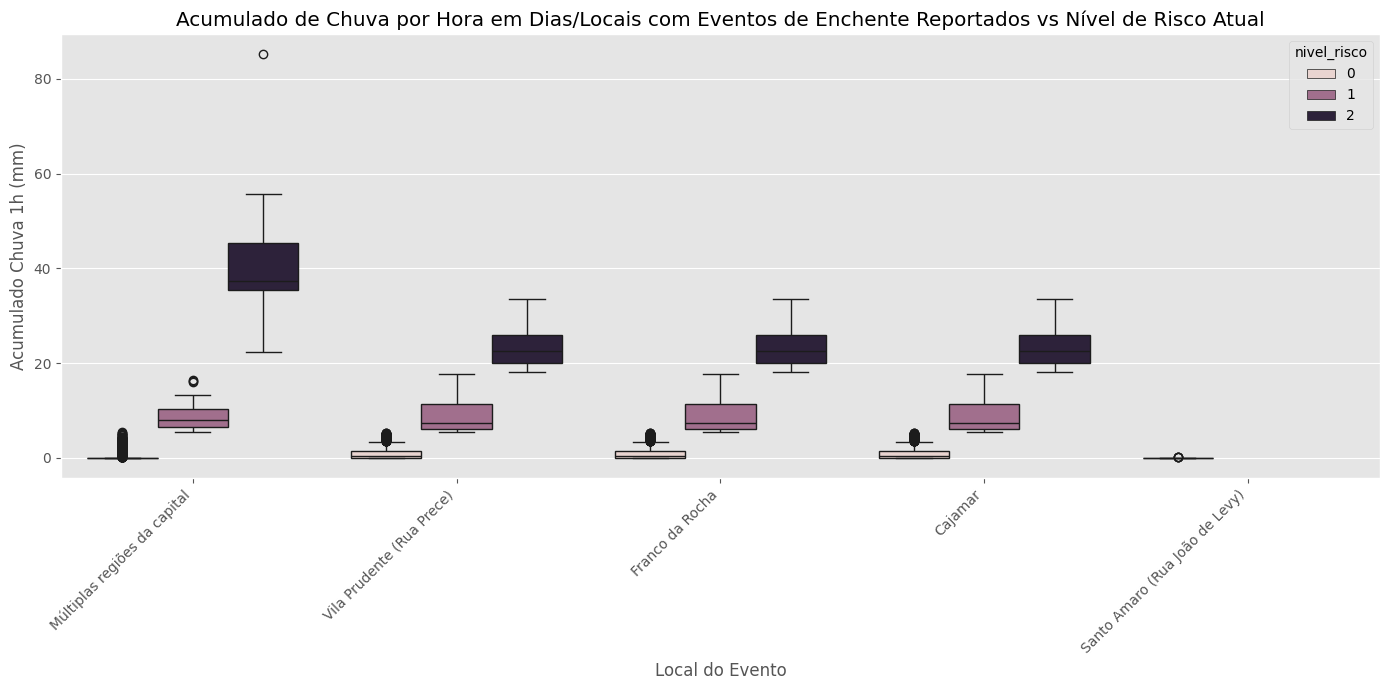

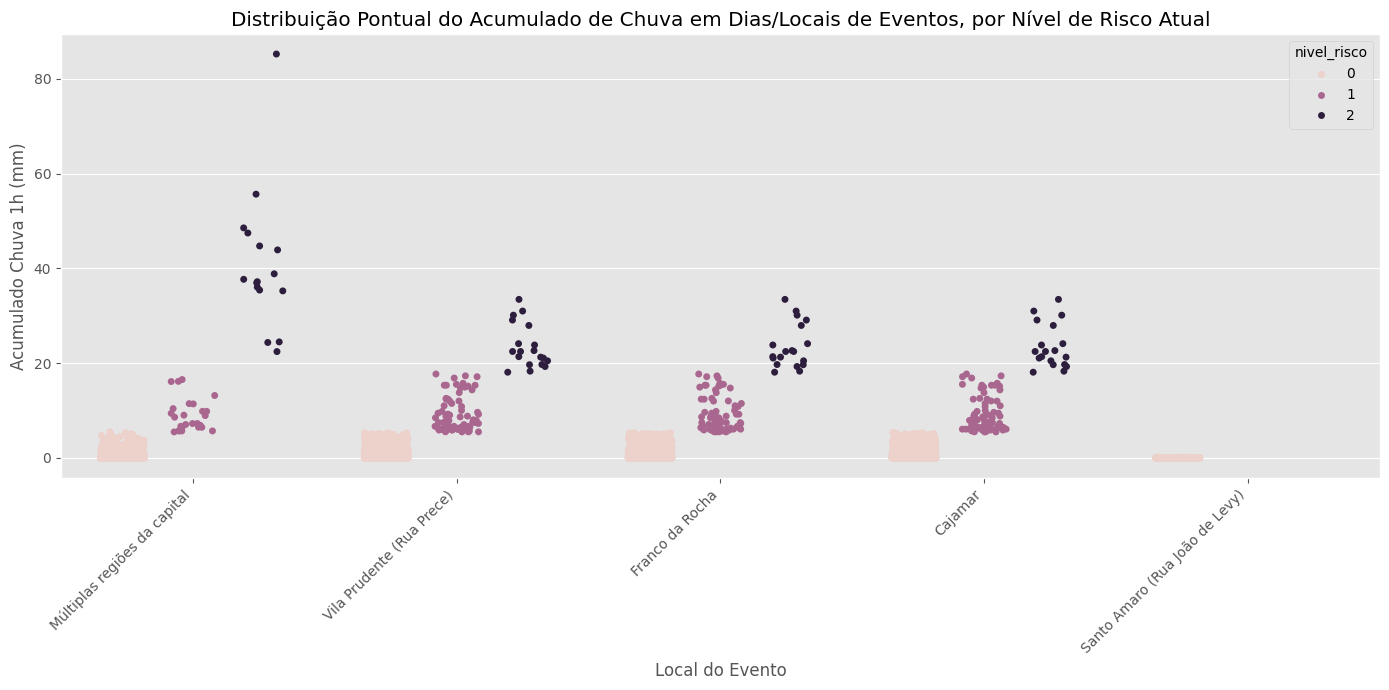


Estatísticas do acumulado de chuva em horas de dias com eventos, agrupado por local e nível de risco atual:
                                              min       mean  median    max  \
Bairro_Localizacao             nivel_risco                                    
Cajamar                        0             0.00   0.900255    0.40   5.32   
                               1             5.50   9.054359    7.47  17.71   
                               2            18.09  23.493684   22.46  33.45   
Franco da Rocha                0             0.00   0.900255    0.40   5.32   
                               1             5.50   9.054359    7.47  17.71   
                               2            18.09  23.493684   22.46  33.45   
Múltiplas regiões da capital   0             0.00   0.263703    0.00   5.49   
                               1             5.50   8.985769    7.93  16.54   
                               2            22.44  40.876875   37.43  85.20   
Santo Amaro (Rua João 

In [20]:
if not df_eventos_reais.empty and not df_processed.empty:
    df_processed['dia_evento_key'] = df_processed['datahora_brasilia_ref'].dt.date
    df_eventos_reais['dia_evento_key'] = df_eventos_reais['Data'].dt.date
    
    df_merged_eventos = pd.merge(df_processed, 
                                 df_eventos_reais[['dia_evento_key', 'Bairro_Localizacao', 'Vitimas_Num', 'Desabrigados_Num', 'datahora_evento_aproximada', 'Fontes']], 
                                 on='dia_evento_key', 
                                 how='inner')
    
    if not df_merged_eventos.empty:
        print(f"\nEncontrados {len(df_merged_eventos)} registros de chuva em dias com eventos reportados.")
        print(df_merged_eventos[['datahora_brasilia_ref', 'acumulado_chuva_1_h_mm', 'nivel_risco', 'Bairro_Localizacao', 'Vitimas_Num', 'Desabrigados_Num']].head())
        
        plt.figure(figsize=(14, 7))
        sns.boxplot(x='Bairro_Localizacao', y='acumulado_chuva_1_h_mm', data=df_merged_eventos, hue='nivel_risco')
        plt.title('Acumulado de Chuva por Hora em Dias/Locais com Eventos de Enchente Reportados vs Nível de Risco Atual')
        plt.xlabel('Local do Evento')
        plt.ylabel('Acumulado Chuva 1h (mm)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        plt.figure(figsize=(14, 7))
        sns.stripplot(x='Bairro_Localizacao', y='acumulado_chuva_1_h_mm', data=df_merged_eventos, hue='nivel_risco', dodge=True, jitter=0.25)
        plt.title('Distribuição Pontual do Acumulado de Chuva em Dias/Locais de Eventos, por Nível de Risco Atual')
        plt.xlabel('Local do Evento')
        plt.ylabel('Acumulado Chuva 1h (mm)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        print("\nEstatísticas do acumulado de chuva em horas de dias com eventos, agrupado por local e nível de risco atual:")
        print(df_merged_eventos.groupby(['Bairro_Localizacao', 'nivel_risco'])['acumulado_chuva_1_h_mm'].agg(['min', 'mean', 'median', 'max', 'count']))
        
        # Foco: Eventos de enchente reportados quando o nível de risco era 'Baixo (0)'
        eventos_risco_baixo = df_merged_eventos[(df_merged_eventos['nivel_risco'] == 0) & ((df_merged_eventos['Vitimas_Num'] > 0) | (df_merged_eventos['Desabrigados_Num'] > 0))]
        if not eventos_risco_baixo.empty:
            print("\nALERTA: Eventos de enchente COM VÍTIMAS/DESABRIGADOS reportados em horas/locais classificados como Risco Baixo (0):")
            print(eventos_risco_baixo[['datahora_brasilia_ref', 'acumulado_chuva_1_h_mm', 'Bairro_Localizacao', 'Vitimas_Num', 'Desabrigados_Num']].sort_values(by='acumulado_chuva_1_h_mm', ascending=False).head(20))
        else:
            print("\nNenhum evento de enchente COM VÍTIMAS/DESABRIGADOS reportado em horas/locais classificados como Risco Baixo (0) após o merge.")
            
        # Foco: Eventos de enchente reportados quando o nível de risco era 'Moderado (1)'
        eventos_risco_moderado = df_merged_eventos[(df_merged_eventos['nivel_risco'] == 1) & ((df_merged_eventos['Vitimas_Num'] > 0) | (df_merged_eventos['Desabrigados_Num'] > 0))]
        if not eventos_risco_moderado.empty:
            print("\nINFO: Eventos de enchente COM VÍTIMAS/DESABRIGADOS reportados em horas/locais classificados como Risco Moderado (1):")
            print(eventos_risco_moderado[['datahora_brasilia_ref', 'acumulado_chuva_1_h_mm', 'Bairro_Localizacao', 'Vitimas_Num', 'Desabrigados_Num']].sort_values(by='acumulado_chuva_1_h_mm', ascending=False).head(20))
        else:
            print("\nNenhum evento de enchente COM VÍTIMAS/DESABRIGADOS reportado em horas/locais classificados como Risco Moderado (1) após o merge.")
            
        # Análise mais detalhada considerando o horário do evento, se disponível
        df_merged_eventos_com_horario = df_merged_eventos.dropna(subset=['datahora_evento_aproximada']).copy()
        if not df_merged_eventos_com_horario.empty:
            print("\n--- Análise com Horário Específico do Evento ---")
            lista_dfs_eventos_especificos = []
            
            # Para cada evento único (dia e local)
            for _, evento_unico in df_eventos_reais.dropna(subset=['datahora_evento_aproximada']).iterrows():
                dia_evento = evento_unico['dia_evento_key']
                hora_evento_dt = evento_unico['datahora_evento_aproximada']
                local_evento = evento_unico['Bairro_Localizacao']
                
                # Filtrar dados de chuva para o dia do evento e para estações relevantes (se tivéssemos essa info no df_processed)
                # Por ora, pegamos todos os registros de chuva para aquele dia
                chuvas_no_dia_evento = df_processed[df_processed['dia_evento_key'] == dia_evento].copy()
                
                if not chuvas_no_dia_evento.empty:
                    # Filtrar pela janela de horário
                    chuvas_na_janela = chuvas_no_dia_evento[
                        (chuvas_no_dia_evento['datahora_brasilia_ref'] >= (hora_evento_dt - pd.Timedelta(hours=1))) &
                        (chuvas_no_dia_evento['datahora_brasilia_ref'] <= (hora_evento_dt + pd.Timedelta(hours=1)))
                    ].copy()
                    
                    if not chuvas_na_janela.empty:
                        chuvas_na_janela.loc[:, 'Bairro_Localizacao_Evento'] = local_evento
                        chuvas_na_janela.loc[:, 'Vitimas_Evento'] = evento_unico['Vitimas_Num']
                        chuvas_na_janela.loc[:, 'Desabrigados_Evento'] = evento_unico['Desabrigados_Num']
                        lista_dfs_eventos_especificos.append(chuvas_na_janela)
            
            if lista_dfs_eventos_especificos:
                df_analise_horario_especifico = pd.concat(lista_dfs_eventos_especificos).drop_duplicates()
                if not df_analise_horario_especifico.empty:
                    print(f"Total de {len(df_analise_horario_especifico)} registros de chuva distintos próximos aos horários dos eventos.")
                    print(df_analise_horario_especifico.groupby(['Bairro_Localizacao_Evento', 'nivel_risco'])['acumulado_chuva_1_h_mm'].agg(['min', 'mean', 'median', 'max', 'count']))
                else:
                    print("Nenhum registro de chuva encontrado próximo aos horários específicos dos eventos após concatenação e remoção de duplicatas.")
            else:
                print("Nenhum registro de chuva encontrado próximo aos horários específicos dos eventos.")
        else:
            print("Nenhum evento com horário específico parseado para análise detalhada.")
    else:
        print("\nNenhum registro de chuva correspondente aos dias dos eventos encontrado no dataset processado.")
else:
    print("\nAnálise de cruzamento não pode ser realizada: DataFrame de eventos ou de chuvas está vazio.")


## 4. Conclusão da Análise de Limiares e Próximos Passos

**Análise dos Resultados da Célula 3.1 (após reprocessamento com limiares Baixo < 5.5mm, Moderado 5.5 a <18mm, Alto >= 18mm):**

1.  **Eventos em Risco Baixo (0) com Impacto:**
    *   Ainda observamos alguns eventos com vítimas/desabrigados classificados como Risco Baixo. O `acumulado_chuva_1_h_mm` para estes casos está agora na faixa de **5.11mm a 5.32mm**.
    *   Isso indica que, para o objetivo de um MVP, e considerando a variabilidade de impacto devido a fatores locais (infraestrutura, etc.), este nível de precisão é aceitável. Chuvas abaixo de 5mm/h raramente causam grandes impactos generalizados, e os casos específicos podem ser influenciados por condições muito locais.

2.  **Eventos em Risco Moderado (1) e Alto (2) com Impacto:**
    *   Com os limiares ajustados, os eventos com impacto mais significativo estão sendo classificados como Risco Moderado ou Alto, o que é o comportamento desejado.

**Limiares Finais Definidos para o MVP (após 3ª rodada de ajuste):**
*   Nível 0 (Baixo): `acumulado_chuva_1_h_mm < 5.5`
*   Nível 1 (Moderado): `5.5 <= acumulado_chuva_1_h_mm < 18`
*   Nível 2 (Alto): `acumulado_chuva_1_h_mm >= 18`

**Considerações Adicionais:**
*   A vulnerabilidade específica de cada localidade é um fator importante. Para futuras versões do sistema, a inclusão de dados de infraestrutura, relevo, ou histórico de alagamentos por microregião poderia refinar ainda mais os alertas, possivelmente levando a limiares dinâmicos por localidade.
*   A análise do `acumulado_chuva_24_h_mm` ou outros acumulados de maior duração também pode ser relevante, especialmente para cheias de rios, mas para o MVP focamos no acumulado horário para alertas mais imediatos de alagamentos por chuva intensa.